# Attempting to gensim CA data

## Part 1
Constucts dictionary by opening up text files of CAs, normalizing and lemmatizing, saves to tmp directory

## Part 2
Constructs corpus by processing text files in same way

## Part 3
Shows some output of different models trained on the corpus

In [50]:
import logging
import os
import tempfile
import glob
import string
import nltk
import matplotlib as plt
from smart_open import smart_open
from gensim import corpora, models, similarities

%matplotlib inline
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
TEMP_FOLDER = tempfile.gettempdir()
#print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))

In [51]:
# Stemming & Lemmetization 

## Module constants
lemmatizer  = nltk.WordNetLemmatizer()
stopwords   = set(nltk.corpus.stopwords.words('english'))
punctuation = string.punctuation

def normalize(text):
    """
    Lower cases, lemmatizes and excludes stuff from nltk stopwords
    """
    text = text.lower()
    text = lemmatizer.lemmatize(text)
    if text not in stopwords and text not in punctuation:
        return str(text)
    else:
        return ""


In [52]:
# CA Text

ca_look_up = []
documents = []
for f in sorted(glob.glob("TEXT/*.txt")):
    #attempt to get rid of 'numeric' words and punctuation
    docline = open(f).read()
    #print(f,)
    finaldoc = ""
    for d in docline.split(" "):
        if d.isalpha():
            finaldoc += " " + normalize(d)
    if len(finaldoc) != 0:
        documents.append(finaldoc)
        ca_look_up.append(f[8:-4])
        #print("\t",len(finaldoc)," words processed")
    #else:
        #print(" skipped to due to empty file")

#print(ca_look_up)

In [53]:
# remove common words and tokenize
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]
         for document in documents]

# remove words that appear only once
from collections import defaultdict
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1] for text in texts]

from pprint import pprint  # pretty-printer
pprint(texts)

[['academic',
  'professional',
  'statement',
  'within',
  'body',
  'herein',
  'subject',
  'subject',
  'staff',
  'member',
  'shall',
  'hindered',
  'impeded',
  'way',
  'board',
  'association',
  'exercising',
  'legal',
  'right',
  'shall',
  'suffer',
  'penalty',
  'exercise',
  'legal',
  'academic',
  'common',
  'good',
  'society',
  'depends',
  'upon',
  'search',
  'knowledge',
  'free',
  'academic',
  'freedom',
  'university',
  'essential',
  'purpose',
  'teaching',
  'function',
  'university',
  'well',
  'scholarship',
  'party',
  'agree',
  'infringe',
  'abridge',
  'academic',
  'freedom',
  'member',
  'academic',
  'member',
  'university',
  'community',
  'regardless',
  'prescribed',
  'freedom',
  'carrying',
  'research',
  'publishing',
  'result',
  'freedom',
  'teaching',
  'freedom',
  'criticize',
  'university',
  'freedom',
  'institutional',
  'academic',
  'freedom',
  'doe',
  'require',
  'neutrality',
  'part',
  'academic',
  'free

  'matter',
  'related',
  'freedom',
  'expression',
  'based',
  'respect',
  'opinion',
  'member',
  'academic',
  'librarian',
  'archivist',
  'faculty',
  'duty',
  'promote',
  'maintain',
  'intellectual',
  'responsibility',
  'protect',
  'academic',
  'freedom',
  'entitled',
  'full',
  'protection',
  'academic',
  'freedom',
  'includes',
  'right',
  'express',
  'academic',
  'judgment',
  'development',
  'library',
  'collection',
  'make',
  'collection',
  'accessible',
  'user',
  'accordance',
  'university',
  'library',
  'even',
  'material',
  'considered',
  'includes',
  'right',
  'express',
  'academic',
  'judgment',
  'acquisition',
  'development'],
 ['academic',
  'common',
  'good',
  'society',
  'depends',
  'upon',
  'search',
  'knowledge',
  'free',
  'academic',
  'freedom',
  'university',
  'essential',
  'purpose',
  'teaching',
  'function',
  'university',
  'well',
  'scholarship',
  'academic',
  'staff',
  'shall',
  'hindered',
  'impe

 ['academic',
  'academic',
  'freedom',
  'research',
  'fundamental',
  'value',
  'essential',
  'common',
  'search',
  'knowledge',
  'free',
  'expression',
  'right',
  'party',
  'protect',
  'academic',
  'freedom',
  'freedom',
  'conduct',
  'teach',
  'involves',
  'right',
  'speculate',
  'well',
  'right',
  'criticize',
  'challenge',
  'association',
  'society',
  'party',
  'agree',
  'infringe',
  'abridge',
  'academic',
  'freedom',
  'member',
  'regardless',
  'prescribed',
  'free',
  'threat',
  'institutional',
  'reprisal',
  'without',
  'regard',
  'outside',
  'pursue',
  'academic',
  'interest',
  'conduct',
  'research',
  'publish',
  'result',
  'engage',
  'teaching',
  'pursue',
  'creative',
  'otherwise',
  'use',
  'form',
  'documentary',
  'material',
  'exercise',
  'professional',
  'except',
  'otherwise',
  'specified',
  'member',
  'hindered',
  'way',
  'university',
  'association',
  'exercise',
  'legal',
  'including',
  'limited',


In [54]:
dictionary = corpora.Dictionary(texts)
dictionary.save(os.path.join(TEMP_FOLDER, 'ca_corpus.dict'))  # store the dictionary, for future reference
print(dictionary)

2018-05-17 14:20:14,226 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-05-17 14:20:14,233 : INFO : built Dictionary(544 unique tokens: ['abridge', 'academic', 'agree', 'association', 'basic']...) from 35 documents (total 5232 corpus positions)
2018-05-17 14:20:14,234 : INFO : saving Dictionary object under /tmp/ca_corpus.dict, separately None
2018-05-17 14:20:14,235 : INFO : saved /tmp/ca_corpus.dict


Dictionary(544 unique tokens: ['abridge', 'academic', 'agree', 'association', 'basic']...)


In [55]:
pprint(dictionary.token2id)

{'abide': 421,
 'abridge': 0,
 'academic': 1,
 'accept': 540,
 'acceptability': 231,
 'accepted': 316,
 'access': 74,
 'accessible': 425,
 'accomplishment': 459,
 'accordance': 131,
 'acknowledge': 232,
 'acknowledgement': 317,
 'acquisition': 426,
 'act': 105,
 'acting': 106,
 'action': 309,
 'activity': 107,
 'adequately': 530,
 'adherence': 318,
 'administration': 132,
 'administrative': 133,
 'advance': 134,
 'advancement': 135,
 'affiliation': 136,
 'affirm': 269,
 'agency': 504,
 'agree': 2,
 'agreed': 495,
 'agreement': 75,
 'allow': 137,
 'allowed': 433,
 'also': 138,
 'appendix': 310,
 'applicable': 460,
 'application': 270,
 'apply': 505,
 'appointment': 496,
 'appropriate': 290,
 'approved': 291,
 'archival': 461,
 'archivist': 454,
 'arising': 506,
 'article': 76,
 'aspect': 139,
 'assigned': 319,
 'association': 3,
 'attempt': 108,
 'attention': 531,
 'author': 462,
 'authorized': 109,
 'authorship': 463,
 'available': 233,
 'bargaining': 292,
 'base': 77,
 'based': 434,
 

In [56]:
# Re-using text processed by dictionary construction, so it is cleaned up already!

corpus = [dictionary.doc2bow(text) for text in texts]

corpora.MmCorpus.serialize(os.path.join(TEMP_FOLDER, 'ca_corpus.mm'), corpus)  # store to disk, for later use
for c in corpus:
    print(c)

2018-05-17 14:20:14,372 : INFO : storing corpus in Matrix Market format to /tmp/ca_corpus.mm
2018-05-17 14:20:14,374 : INFO : saving sparse matrix to /tmp/ca_corpus.mm
2018-05-17 14:20:14,375 : INFO : PROGRESS: saving document #0
2018-05-17 14:20:14,386 : INFO : saved 35x544 matrix, density=16.113% (3068/19040)
2018-05-17 14:20:14,387 : INFO : saving MmCorpus index to /tmp/ca_corpus.mm.index


[(0, 1), (1, 8), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 2), (25, 10), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 2), (36, 1), (37, 2), (38, 2), (39, 1), (40, 1), (41, 5), (42, 3), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 5), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 2), (62, 1), (63, 3), (64, 1), (65, 2), (66, 1), (67, 2), (68, 5), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1)]
[(0, 1), (1, 9), (2, 1), (3, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (15, 1), (16, 1), (18, 2), (19, 1), (21, 1), (23, 2), (24, 1), (25, 13), (26, 1), (27, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (40, 1), (41, 5), (44, 2), (46, 1), (49, 2), (50, 1), (51, 1), (55, 2), (56, 1), (57, 2), (58, 

In [57]:
#class MyCorpus(object):
#    def __iter__(self):
#        for f in glob.glob("TEXT/*.txt"):
#            line = open(f).read()
#            yield dictionary.doc2bow(line.lower().split())
        

In [58]:
#corpus_memory_friendly = MyCorpus() # doesn't load the corpus into memory!
#print(corpus_memory_friendly)

In [59]:
#for vector in corpus_memory_friendly:  # load one vector into memory at a time
#    print(vector)

In [60]:
#Restart from this point on

tfidf = models.TfidfModel(corpus)

2018-05-17 14:20:14,423 : INFO : collecting document frequencies
2018-05-17 14:20:14,425 : INFO : PROGRESS: processing document #0
2018-05-17 14:20:14,429 : INFO : calculating IDF weights for 35 documents and 543 features (3068 matrix non-zeros)


In [61]:
corpus_tfidf = tfidf[corpus]
lsi = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2) # initialize an LSI transformation
corpus_lsi = lsi[corpus_tfidf] # create a double wrapper over the orig3nal corpus: bow->tfidf->fold-in-lsi

2018-05-17 14:20:14,444 : INFO : using serial LSI version on this node
2018-05-17 14:20:14,446 : INFO : updating model with new documents
2018-05-17 14:20:14,473 : INFO : preparing a new chunk of documents
2018-05-17 14:20:14,480 : INFO : using 100 extra samples and 2 power iterations
2018-05-17 14:20:14,481 : INFO : 1st phase: constructing (544, 102) action matrix
2018-05-17 14:20:14,482 : INFO : orthonormalizing (544, 102) action matrix
2018-05-17 14:20:14,506 : INFO : 2nd phase: running dense svd on (102, 35) matrix
2018-05-17 14:20:14,511 : INFO : computing the final decomposition
2018-05-17 14:20:14,513 : INFO : keeping 2 factors (discarding 82.424% of energy spectrum)
2018-05-17 14:20:14,519 : INFO : processed documents up to #35
2018-05-17 14:20:14,521 : INFO : topic #0(2.114): 0.186*"faculty" + 0.113*"exercising" + 0.110*"censorship" + 0.110*"association" + 0.109*"shall" + 0.109*"librarian" + 0.103*"institution" + 0.098*"exercise" + 0.096*"library" + 0.095*"staff"
2018-05-17 14

In [62]:
lsi.print_topics(2)

2018-05-17 14:20:14,541 : INFO : topic #0(2.114): 0.186*"faculty" + 0.113*"exercising" + 0.110*"censorship" + 0.110*"association" + 0.109*"shall" + 0.109*"librarian" + 0.103*"institution" + 0.098*"exercise" + 0.096*"library" + 0.095*"staff"
2018-05-17 14:20:14,549 : INFO : topic #1(1.297): 0.213*"teacher" + 0.161*"exercised" + 0.161*"desire" + 0.161*"allowed" + 0.161*"placed" + 0.161*"profession" + 0.147*"exercising" + -0.136*"deference" + 0.136*"done" + 0.136*"bias"


[(0,
  '0.186*"faculty" + 0.113*"exercising" + 0.110*"censorship" + 0.110*"association" + 0.109*"shall" + 0.109*"librarian" + 0.103*"institution" + 0.098*"exercise" + 0.096*"library" + 0.095*"staff"'),
 (1,
  '0.213*"teacher" + 0.161*"exercised" + 0.161*"desire" + 0.161*"allowed" + 0.161*"placed" + 0.161*"profession" + 0.147*"exercising" + -0.136*"deference" + 0.136*"done" + 0.136*"bias"')]

In [63]:
for doc in corpus_lsi: # both bow->tfidf and tfidf->lsi transformations are actually executed here, on the fly
    print(doc)

[(0, 0.3511247571877933), (1, 0.06960149518505822)]
[(0, 0.4475011393098804), (1, 0.12920691497166506)]
[(0, 0.27949346524015234), (1, -0.03294346779902319)]
[(0, 0.26534947726101843), (1, -0.02108548106420112)]
[(0, 0.4587105305950654), (1, -0.19323527977132107)]
[(0, 0.21990206667684667), (1, -0.019910256819479215)]
[(0, 0.21382413984743195), (1, -0.016222175907125082)]
[(0, 0.09143698740149146), (1, -0.16251566149832386)]
[(0, 0.39188292860614293), (1, -0.13108925399673862)]
[(0, 0.37176950003171166), (1, 0.09999513694561848)]
[(0, 0.28787483998250896), (1, -0.12962467939688396)]
[(0, 0.4650654867770936), (1, 0.18764405052565694)]
[(0, 0.23628688349643004), (1, -0.17410639265268243)]
[(0, 0.27294763241667047), (1, 0.15520040984727676)]
[(0, 0.41272061954869793), (1, -0.17766850169966378)]
[(0, 0.42264378659170926), (1, 0.5803557255349233)]
[(0, 0.4745958522189055), (1, 0.1886083769334321)]
[(0, 0.42777590705536217), (1, 0.09726211773821816)]
[(0, 0.3283238789041158), (1, -0.10830462

In [64]:
lsi.save(os.path.join(TEMP_FOLDER, 'ca_model.lsi')) # same for tfidf, lda, ...

2018-05-17 14:20:14,632 : INFO : saving Projection object under /tmp/ca_model.lsi.projection, separately None
2018-05-17 14:20:14,639 : INFO : saved /tmp/ca_model.lsi.projection
2018-05-17 14:20:14,640 : INFO : saving LsiModel object under /tmp/ca_model.lsi, separately None
2018-05-17 14:20:14,641 : INFO : not storing attribute projection
2018-05-17 14:20:14,643 : INFO : not storing attribute dispatcher
2018-05-17 14:20:14,645 : INFO : saved /tmp/ca_model.lsi


In [65]:
model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=300)

2018-05-17 14:20:14,669 : INFO : using serial LSI version on this node
2018-05-17 14:20:14,669 : INFO : updating model with new documents
2018-05-17 14:20:14,720 : INFO : preparing a new chunk of documents
2018-05-17 14:20:14,724 : INFO : using 100 extra samples and 2 power iterations
2018-05-17 14:20:14,726 : INFO : 1st phase: constructing (544, 400) action matrix
2018-05-17 14:20:14,729 : INFO : orthonormalizing (544, 400) action matrix
2018-05-17 14:20:14,808 : INFO : 2nd phase: running dense svd on (400, 35) matrix
2018-05-17 14:20:14,810 : INFO : computing the final decomposition
2018-05-17 14:20:14,814 : INFO : keeping 35 factors (discarding 0.000% of energy spectrum)
2018-05-17 14:20:14,816 : INFO : processed documents up to #35
2018-05-17 14:20:14,818 : INFO : topic #0(2.114): 0.186*"faculty" + 0.113*"exercising" + 0.110*"censorship" + 0.110*"association" + 0.109*"shall" + 0.109*"librarian" + 0.103*"institution" + 0.098*"exercise" + 0.096*"library" + 0.095*"staff"
2018-05-17 14

In [66]:
model = models.LdaModel(corpus, id2word=dictionary, num_topics=100)

2018-05-17 14:20:14,831 : INFO : using symmetric alpha at 0.01
2018-05-17 14:20:14,833 : INFO : using symmetric eta at 0.01
2018-05-17 14:20:14,835 : INFO : using serial LDA version on this node
2018-05-17 14:20:14,853 : INFO : running online (single-pass) LDA training, 100 topics, 1 passes over the supplied corpus of 35 documents, updating model once every 35 documents, evaluating perplexity every 35 documents, iterating 50x with a convergence threshold of 0.001000
2018-05-17 14:20:14,855 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2018-05-17 14:20:14,994 : INFO : -39.110 per-word bound, 593147453469.3 perplexity estimate based on a held-out corpus of 35 documents with 5232 words
2018-05-17 14:20:14,995 : INFO : PROGRESS: pass 0, at document #35/35
2018-05-17 14:20:15,100 : INFO : topic #98 (0.010): 0.002*"standard" + 0.002*"system" + 0.002*"role" + 0.002*"select" + 0.002*"share" + 0.002*"shared" 

In [67]:
model = models.HdpModel(corpus, id2word=dictionary)

2018-05-17 14:20:15,275 : INFO : (0, '0.019*freedom + 0.017*academic + 0.015*member + 0.010*exercise + 0.009*contract + 0.009*shall + 0.008*research + 0.008*unimpeded + 0.007*association + 0.007*right')
2018-05-17 14:20:15,276 : INFO : (1, '0.017*academic + 0.016*freedom + 0.011*src + 0.010*party + 0.010*university + 0.008*set + 0.008*society + 0.008*doe + 0.008*professional + 0.007*fulfillment')
2018-05-17 14:20:15,278 : INFO : (2, '0.020*academic + 0.020*freedom + 0.017*member + 0.013*university + 0.013*faculty + 0.010*brescia + 0.010*without + 0.009*state + 0.008*college + 0.008*right')
2018-05-17 14:20:15,280 : INFO : (3, '0.024*freedom + 0.017*academic + 0.008*even + 0.008*well + 0.008*search + 0.008*publicly + 0.007*condition + 0.007*university + 0.007*respect + 0.007*question')
2018-05-17 14:20:15,283 : INFO : (4, '0.011*right + 0.011*full + 0.011*would + 0.010*academic + 0.010*member + 0.009*participation + 0.009*speak + 0.008*university + 0.008*freedom + 0.008*criticism')
2018

## Adding in stuff from Similarity Queries

In [68]:
corpus = corpora.MmCorpus(os.path.join(TEMP_FOLDER, 'ca_corpus.mm'))

2018-05-17 14:20:15,323 : INFO : loaded corpus index from /tmp/ca_corpus.mm.index
2018-05-17 14:20:15,324 : INFO : initializing cython corpus reader from /tmp/ca_corpus.mm
2018-05-17 14:20:15,325 : INFO : accepted corpus with 35 documents, 544 features, 3068 non-zero entries


In [69]:
lsi = models.LsiModel(corpus, id2word=dictionary, num_topics=2)

2018-05-17 14:20:15,338 : INFO : using serial LSI version on this node
2018-05-17 14:20:15,346 : INFO : updating model with new documents
2018-05-17 14:20:15,351 : INFO : preparing a new chunk of documents
2018-05-17 14:20:15,354 : INFO : using 100 extra samples and 2 power iterations
2018-05-17 14:20:15,356 : INFO : 1st phase: constructing (544, 102) action matrix
2018-05-17 14:20:15,359 : INFO : orthonormalizing (544, 102) action matrix
2018-05-17 14:20:15,375 : INFO : 2nd phase: running dense svd on (102, 35) matrix
2018-05-17 14:20:15,378 : INFO : computing the final decomposition
2018-05-17 14:20:15,379 : INFO : keeping 2 factors (discarding 26.674% of energy spectrum)
2018-05-17 14:20:15,381 : INFO : processed documents up to #35
2018-05-17 14:20:15,382 : INFO : topic #0(115.706): 0.541*"freedom" + 0.515*"academic" + 0.281*"member" + 0.258*"university" + 0.193*"right" + 0.147*"shall" + 0.140*"research" + 0.125*"faculty" + 0.118*"responsibility" + 0.105*"doe"
2018-05-17 14:20:15,3

In [70]:
index = similarities.MatrixSimilarity(lsi[corpus])
index.save(os.path.join(TEMP_FOLDER, 'ca_corpus.index'))

2018-05-17 14:20:15,392 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2018-05-17 14:20:15,401 : INFO : creating matrix with 35 documents and 2 features
2018-05-17 14:20:15,411 : INFO : saving MatrixSimilarity object under /tmp/ca_corpus.index, separately None
2018-05-17 14:20:15,413 : INFO : saved /tmp/ca_corpus.index


In [91]:

for c in range(0,len(corpus)):
    print(ca_look_up[c],'\t\t\t',lsi[corpus[c]])


Athabasca 			 [(0, 16.157782749581425), (1, 2.9834002723250572)]
Atlantic_School_Theology 			 [(0, 18.229303824971762), (1, 4.499296389995825)]
Brandon 			 [(0, 12.170947740609773), (1, 3.2316161459573642)]
Brescia 			 [(0, 35.34439829237365), (1, -29.33737161207567)]
Brock 			 [(0, 22.87770774272394), (1, 1.3023735366704363)]
Concordia 			 [(0, 10.632802212449509), (1, -1.5183900656826583)]
Dalhousie 			 [(0, 15.455406935522292), (1, 3.556450326349761)]
Emily_Carr 			 [(0, 2.620511039669558), (1, 0.6711920261210175)]
Grant_MacEwan 			 [(0, 36.30961040539683), (1, -11.830344915328029)]
Laurentian 			 [(0, 19.54382912966319), (1, 4.154930355144427)]
Mount_Allison 			 [(0, 18.942335473412964), (1, 6.389911445855922)]
Mount_Royal 			 [(0, 19.153055441502243), (1, 4.31016496700273)]
Mount_Saint_Vincent 			 [(0, 8.41671282588056), (1, 1.458858856195257)]
Okanagan 			 [(0, 11.183506858062167), (1, 4.306643158791968)]
Queens 			 [(0, 25.369755646189038), (1, 3.3521429918642176)]
Ryerson 			 [

In [81]:
# coorordinate of corpus entry (by subscript) along those two-coorodinates  

X = []
Y = []

for i in range(0,len(corpus)):
    #print(ca_look_up[i],lsi[corpus[i]])
    X.append(lsi[corpus[i]][0][1])
    Y.append(lsi[corpus[i]][1][1])
    
    
#print(X)

[(0, 35.34439829237365), (1, -29.33737161207567)]


In [76]:
# looks up each corpus entry (by subscript)
index[lsi[corpus[3]]]

array([0.64070624, 0.59400046, 0.5797913 , 1.        , 0.73192084,
       0.85202765, 0.606642  , 0.5869311 , 0.92947054, 0.61983013,
       0.5249491 , 0.61046886, 0.64908373, 0.48854098, 0.67917097,
       0.7789264 , 0.76317257, 0.61916244, 0.5109253 , 0.86455727,
       0.98780936, 0.69003177, 0.6008987 , 0.6924654 , 0.84996355,
       0.44919536, 0.5795561 , 0.70934755, 0.4704172 , 0.8287953 ,
       0.9064262 , 0.52151054, 0.81489974, 0.79575217, 0.64298403],
      dtype=float32)

In [77]:
#Lookup to change between label name and index
ca_look_up[3]

'Brescia'

/home/zafrik/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


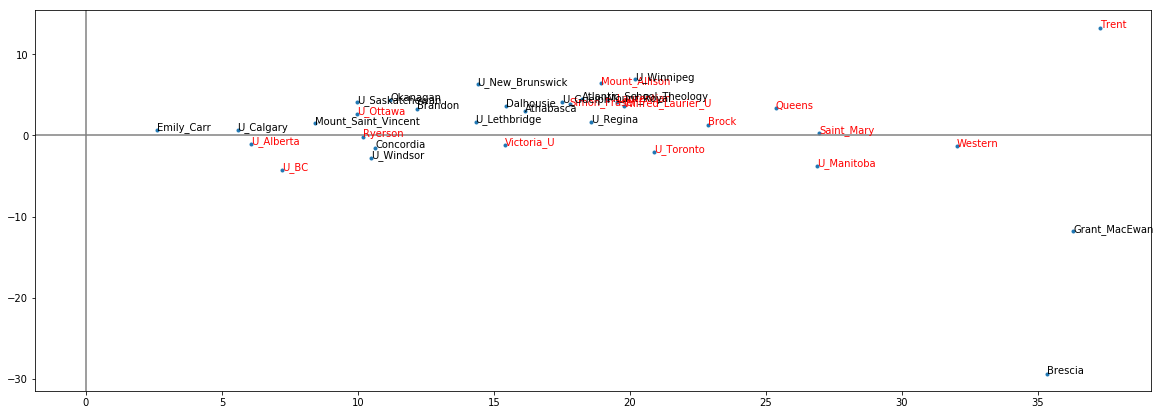

In [74]:
fig = plt.pyplot.figure(figsize=(20,7))

plt.pyplot.plot(X,Y,".")

ax = fig.add_subplot(111)

for l in range(0,len(corpus)):
    if l in [4,9,10,14,15,16,17,18,19,20,24,26,29,32,33,34]:
        #lib specific cas
        ax.annotate('%s' %ca_look_up[l] ,xy=(X[l],Y[l]),color="red")
    else:
        ax.annotate('%s' %ca_look_up[l] ,xy=(X[l],Y[l]),color="black")
    
#for i,j in zip(X,Y):
#    ax.annotate('%s)' %j, xy=(i,j), xytext=(30,0))
#    ax.annotate('(%s,' %i, xy=(i,j))

plt.pyplot.axhline(0, color='grey')
plt.pyplot.axvline(0, color='grey')

#plt.pyplot.axis([4, 25, -10, 10])
plt.pyplot.show()

In [75]:
for i in range(0,len(corpus)):
    print(i, ",",ca_look_up[i])

0 , Athabasca
1 , Atlantic_School_Theology
2 , Brandon
3 , Brescia
4 , Brock
5 , Concordia
6 , Dalhousie
7 , Emily_Carr
8 , Grant_MacEwan
9 , Laurentian
10 , Mount_Allison
11 , Mount_Royal
12 , Mount_Saint_Vincent
13 , Okanagan
14 , Queens
15 , Ryerson
16 , Saint_Mary
17 , Simon_Fraser
18 , Trent
19 , U_Alberta
20 , U_BC
21 , U_Calgary
22 , U_Guelph
23 , U_Lethbridge
24 , U_Manitoba
25 , U_New_Brunswick
26 , U_Ottawa
27 , U_Regina
28 , U_Saskatchewan
29 , U_Toronto
30 , U_Windsor
31 , U_Winnipeg
32 , Victoria_U
33 , Western
34 , Wilfred_Laurier_U
